<a href="https://colab.research.google.com/github/Raj9825405335/CodSoft/blob/main/Movie_Rating_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df2 = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [ ]:
df2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df2.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df2.isnull().sum()  # Checking for missing values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# Extract numerical part of the duration and convert it to float
df2['Duration'] = df2['Duration'].str.extract('(\d+)').astype(float)

# Fill missing values in 'Duration' column with median
df2['Duration'].fillna(df2['Duration'].median(), inplace=True)


In [ ]:
# Handle missing values
df2['Year'] = df2['Year'].fillna(df2['Year'].mode()[0])
df2['Duration'] = df2['Duration'].fillna(df2['Duration'].median())
df2['Genre'] = df2['Genre'].fillna('Unknown')
df2['Director'] = df2['Director'].fillna('Unknown')
df2[['Actor 1', 'Actor 2', 'Actor 3']] = df2[['Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df2 = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Handle missing values
df2['Year'] = df2['Year'].fillna(df2['Year'].mode()[0])
df2['Duration'] = df2['Duration'].str.extract('(\d+)').astype(float)
df2['Duration'].fillna(df2['Duration'].median(), inplace=True)
df2['Genre'] = df2['Genre'].fillna('Unknown')
df2['Director'] = df2['Director'].fillna('Unknown')
df2[['Actor 1', 'Actor 2', 'Actor 3']] = df2[['Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')

# Convert categorical variables to numerical representations
label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    label_encoders[column] = LabelEncoder()
    df2[column] = label_encoders[column].fit_transform(df2[column])

# Create a feature for total number of actors involved
df2['Total Actors'] = df2[['Actor 1', 'Actor 2', 'Actor 3']].nunique(axis=1)

# Create indicators for popular genres
popular_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror']
for genre in popular_genres:
    genre_column = f'Genre_{genre}'
    if np.isin(genre, label_encoders['Genre'].classes_):
        genre_label = label_encoders['Genre'].transform([genre])[0]  # Get the label for the genre
        df2[genre_column] = (df2['Genre'] == genre_label).astype(int)
    else:
        df2[genre_column] = 0  # Genre not found, set all values to 0

# Display the modified DataFrame
print(df2.head())





                                 Name    Year  Duration  Genre  Rating Votes  \
0                                      (2019)     131.0    299     NaN   NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)     109.0    299     7.0     8   
2                         #Homecoming  (2021)      90.0    351     NaN   NaN   
3                             #Yaaram  (2019)     110.0    228     4.4    35   
4                   ...And Once Again  (2010)     105.0    299     NaN   NaN   

   Director  Actor 1  Actor 2  Actor 3  Total Actors  Genre_Action  \
0      1926     2250      800     3108             3             0   
1      1548     3280     4791      527             3             0   
2      5123     3713     2866     3450             3             0   
3      3319     2917     1504     4020             3             0   
4       385     3112     3462      405             3             0   

   Genre_Adventure  Genre_Comedy  Genre_Drama  Genre_Horror  
0                0             0    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Drop rows with missing values
df.dropna(subset=['Rating', 'Duration', 'Votes'], inplace=True)

# Preprocess the 'Duration' column
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Preprocess the 'Votes' column
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Drop non-numeric columns or columns that are not suitable for modeling
df.drop(columns=['Name', 'Year'], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Split data into features and target variable
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)




Mean Squared Error: 14.07026526897469


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Read the dataset
df2 = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Drop rows with missing values
df2.dropna(subset=['Rating', 'Duration', 'Votes'], inplace=True)

# Preprocess the 'Duration' column
df2['Duration'] = df2['Duration'].astype(str)  # Convert to string
df2['Duration'] = df2['Duration'].str.extract('(\d+)').astype(float)

# Preprocess the 'Votes' column
df2['Votes'] = df2['Votes'].str.replace(',', '').astype(float)

# Drop non-numeric columns or columns that are not suitable for modeling
df2.drop(columns=['Name', 'Year'], inplace=True)

# Encode categorical variables
df2 = pd.get_dummies(df2, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Split data into features and target variable
X = df2.drop(columns=['Rating'])
y = df2['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1.5666206720834523


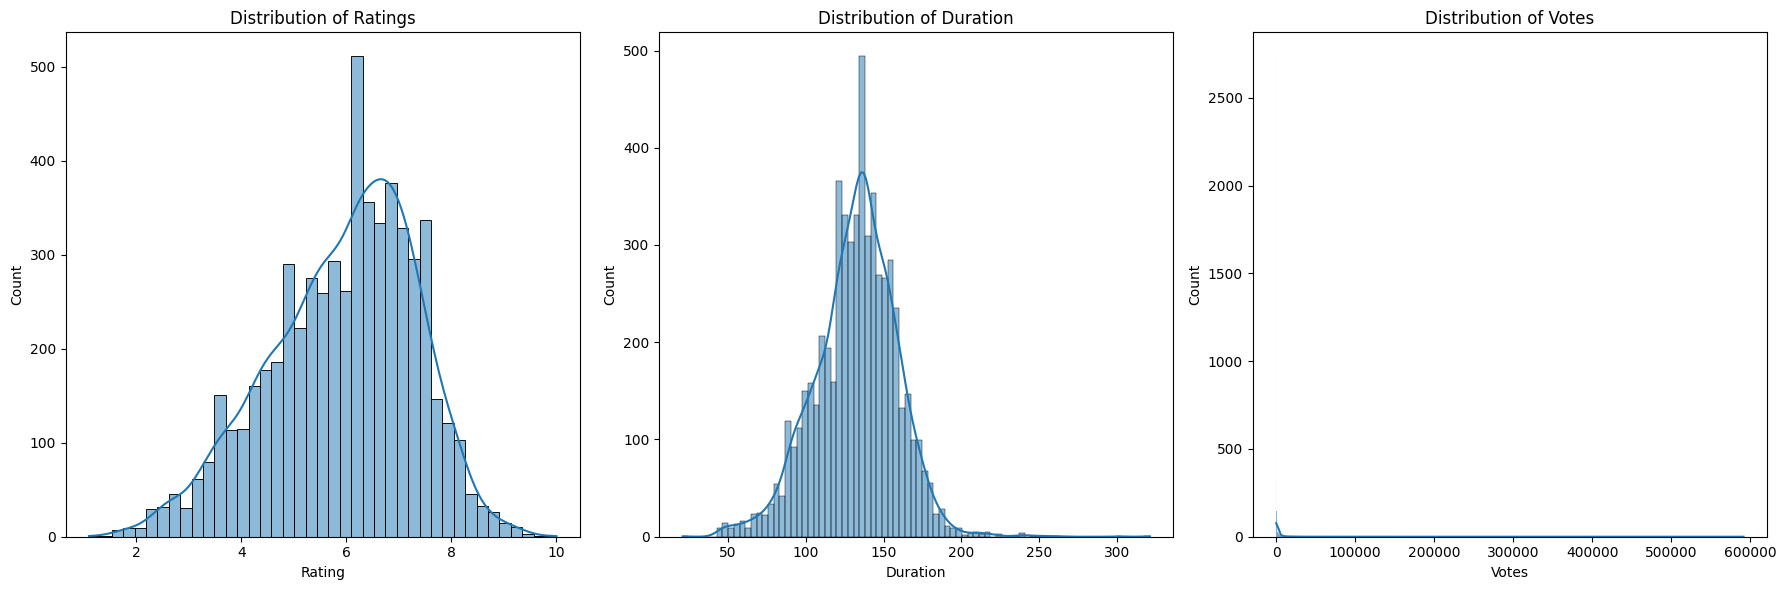

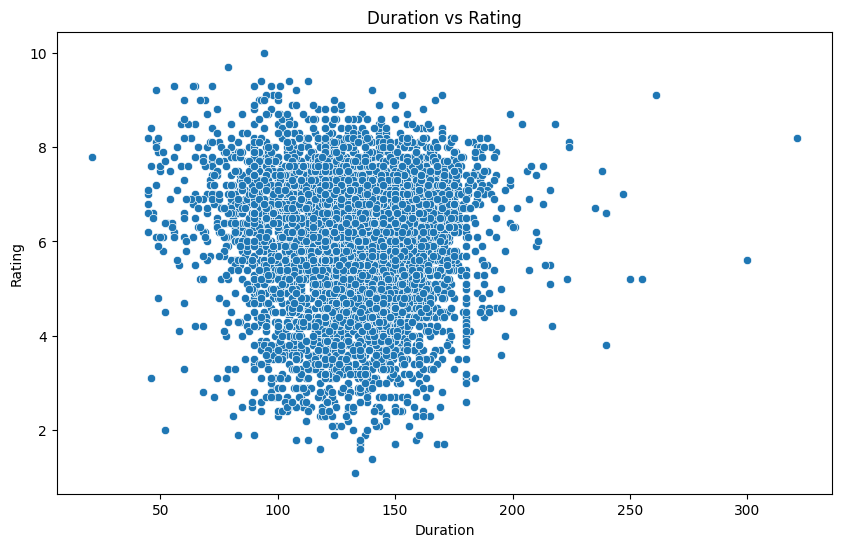

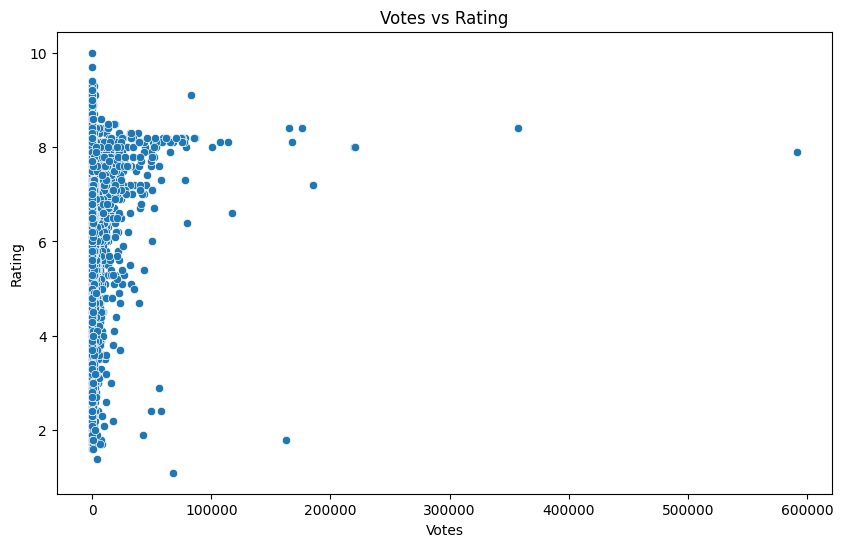

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Drop rows with missing values
df.dropna(subset=['Rating', 'Duration', 'Votes'], inplace=True)

# Preprocess the 'Duration' column
df['Duration'] = df['Duration'].astype(str)  # Convert to string
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Preprocess the 'Votes' column
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Plot histograms for 'Rating', 'Duration', and 'Votes' columns
plt.figure(figsize=(18, 6))

# Histogram for 'Rating'
plt.subplot(1, 3, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')

# Histogram for 'Duration'
plt.subplot(1, 3, 2)
sns.histplot(df['Duration'], kde=True)
plt.title('Distribution of Duration')

# Histogram for 'Votes'
plt.subplot(1, 3, 3)
sns.histplot(df['Votes'], kde=True)
plt.title('Distribution of Votes')

plt.tight_layout()
plt.show()

# Scatter plot of 'Duration' vs 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Duration vs Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

# Scatter plot of 'Votes' vs 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()
